In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice
unclean_number_of_mice = len(merged_df["Mouse ID"].unique())

unclean_number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mouse_ids = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_df = merged_df[merged_df['Mouse ID'].isin(duplicate_mouse_ids)==False]

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame
clean_number_of_mice = len(clean_df["Mouse ID"].unique())

clean_number_of_mice

248

In [6]:
"""""
Generate a summary statistics table of mean, median, variance, standard deviation, 
and SEM of the tumor volume for each regimen

Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mean, median, variance, standard deviation, and SEM of the tumor volume
Assemble the resulting series into a single summary dataframe

"""

grouped_regimen_df = clean_df.groupby("Drug Regimen")

regimen__tumor_mean = grouped_regimen_df["Tumor Volume (mm3)"].mean()
regimen__tumor_median = grouped_regimen_df["Tumor Volume (mm3)"].median()
regimen_tumor_variance = grouped_regimen_df["Tumor Volume (mm3)"].var()
regimen_tumor_std = grouped_regimen_df["Tumor Volume (mm3)"].std()
regimen_tumor_sem = grouped_regimen_df["Tumor Volume (mm3)"].sem()

In [7]:
regimen_summary = {"Mean" : regimen__tumor_mean,
"Median" : regimen__tumor_median,
"Variance" : regimen_tumor_variance,
"Standard Deviation" : regimen_tumor_std,
"Standard Error of Mean" : regimen_tumor_sem}

regimen_tumor_summary_df = pd.DataFrame(regimen_summary)

regimen_tumor_summary_df

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
"""""
Generate a summary statistics table of mean, median, variance, standard deviation, 
and SEM of the tumor volume for each regimen

Using the aggregation method, produce the same summary statistics in a single line

"""

agg_regimen_tumor_summary_df = grouped_regimen_df["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

agg_regimen_tumor_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested 
# for each drug regimen using Pandas

total_timepoints_per_regimen = grouped_regimen_df["Timepoint"].count()

total_timepoints_per_regimen

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

<AxesSubplot:xlabel='Drug Regimen', ylabel='Total Timepoints'>

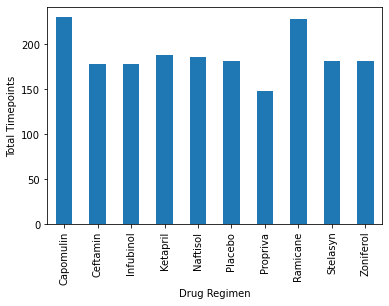

In [10]:
total_timepoints_per_regimen.plot.bar().set_ylabel("Total Timepoints")
total_timepoints_per_regimen.plot.bar()

<function matplotlib.pyplot.show(close=None, block=None)>

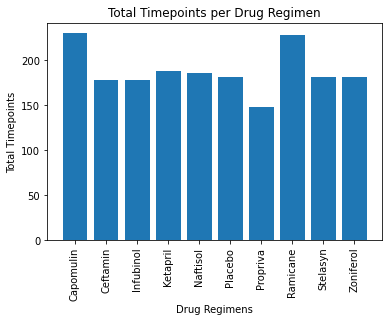

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested 
# for each drug regimen using pyplot

drug_regimens = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", 
                    "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

tumor_volumes = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

plt.bar(drug_regimens, tumor_volumes)

plt.title("Total Timepoints per Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Total Timepoints")
plt.xticks(rotation = 90)

plt.show

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_by_sex_df = clean_df.groupby("Sex").count()

mice_by_sex_df["Mouse ID"]

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

<AxesSubplot:ylabel='Mouse ID'>

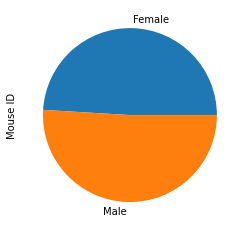

In [13]:
mice_by_sex_df["Mouse ID"].plot.pie()

([<matplotlib.patches.Wedge at 0x2b9cd783370>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')])

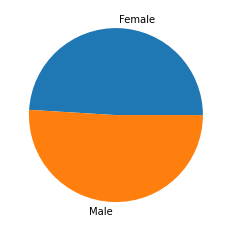

In [14]:
labels = ["Female", "Male"]

measurements_by_gender = [922, 958]

plt.pie(measurements_by_gender, labels = labels)

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

grouped_mice_df = clean_df.groupby("Mouse ID")["Timepoint"].max()

grouped_mice_df.reset_index()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [16]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

max_timepoint_df = pd.merge(grouped_mice_df.reset_index(), clean_df, on = ["Mouse ID", "Timepoint"])

max_timepoint_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
promising_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
promising_treatment_data = []
capomulin_volumes = []
ramicane_volumes = []
infubinol_volumes = []
ceftamin_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes

# for drug_name in promising_treatments:
#     promising_treatment_data.append(max_timepoint_df.loc[max_timepoint_df["Drug Regimen"] == drug_name, "Tumor Volume (mm3)"])

# promising_treatment_data

for row in max_timepoint_df:
    capomulin_volumes.append(max_timepoint_df.loc[max_timepoint_df["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"])

capomulin_volumes

    # add subset 

    
    # Determine outliers using upper and lower bounds

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 19     38.982

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [19]:
capomulin_mouse_df = capomulin_df[capomulin_df['Mouse ID'] == 's185']

capomulin_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [20]:
line_x_axis_data = capomulin_mouse_df['Timepoint']

line_x_axis_data

10     0
11     5
12    10
13    15
14    20
15    25
16    30
17    35
18    40
19    45
Name: Timepoint, dtype: int64

In [21]:
line_y_axis_data = capomulin_mouse_df['Tumor Volume (mm3)']

line_y_axis_data

10    45.000000
11    43.878496
12    37.614948
13    38.177232
14    36.866876
15    33.949940
16    32.959671
17    28.328531
18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64

Text(0.5, 1.0, 'Capomulin Mouse s185 Tumor Volume Over Time')

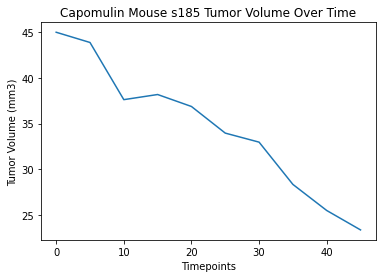

In [22]:
plt.plot(line_x_axis_data, line_y_axis_data)
plt.show
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Mouse s185 Tumor Volume Over Time")

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [24]:
capomulin_weights = capomulin_df["Weight (g)"]

capomulin_weights

10      17
11      17
12      17
13      17
14      17
        ..
440     24
1452    25
1453    25
1454    25
1455    25
Name: Weight (g), Length: 230, dtype: int64

In [25]:
capomulin_tumor_volumes = capomulin_df["Tumor Volume (mm3)"]

capomulin_tumor_volumes

10      45.000000
11      43.878496
12      37.614948
13      38.177232
14      36.866876
          ...    
440     47.685963
1452    45.000000
1453    45.597064
1454    46.059608
1455    46.539206
Name: Tumor Volume (mm3), Length: 230, dtype: float64

Text(0.5, 1.0, 'Capomulin Mice, Weight & Tumor Volume')

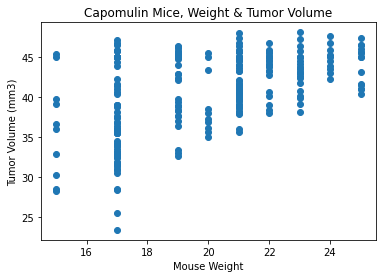

In [26]:
plt.scatter(capomulin_weights, capomulin_tumor_volumes)
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Mice, Weight & Tumor Volume")

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(capomulin_weights, capomulin_tumor_volumes)

correlation

print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.53


In [28]:
model = st.linregress(capomulin_weights, capomulin_tumor_volumes)

model

LinregressResult(slope=0.9609669432428346, intercept=21.489827213299584, rvalue=0.5256995552077166, pvalue=9.605446629502282e-18, stderr=0.10298279892023657, intercept_stderr=2.075157005491298)

In [29]:
y_values = capomulin_weights * model[0] + model[1]

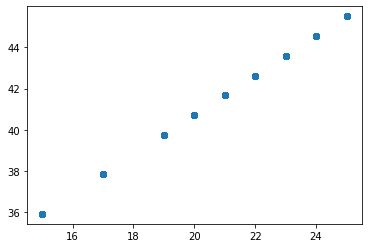

In [30]:
plt.scatter(capomulin_weights, y_values)
